<a href="https://colab.research.google.com/github/Himangi-77/Python_codes/blob/main/Bank_Customer_Churn_Prediction_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset is for ABC Multistate bank with following columns:

customer_id, unused variable.

credit_score, used as input.

country, used as input.

gender, used as input.

age, used as input.

tenure, used as input.

balance, used as input.

products_number, used as input.

credit_card, used as input.

active_member, used as input.

estimated_salary, used as input.

churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

In [62]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

In [43]:
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
data = data.drop(['customer_id'], axis=1)

In [45]:
data.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [46]:
data[data.duplicated()]

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [47]:
data.corr()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


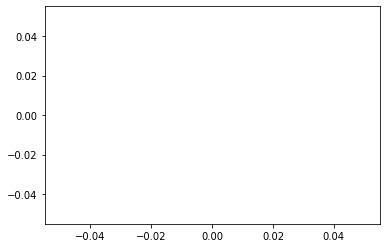

In [48]:
sns.distplot()

In [49]:
data.country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [50]:
data.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [52]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender']) #0: Female 1: Male

In [51]:
data['country'] = le.fit_transform(data['country']) #0: France #1: Germany #2: Spain

In [53]:
x = data.iloc[:,1:10]
y = data.iloc[:,-1]

In [54]:
x

,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,0,0,42,2,0.00,1,1,1,101348.88
1,2,0,41,1,83807.86,1,0,1,112542.58
2,0,0,42,8,159660.80,3,1,0,113931.57
3,0,0,39,1,0.00,2,0,0,93826.63
4,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,0,1,39,5,0.00,2,1,0,96270.64
9996,0,1,35,10,57369.61,1,1,1,101699.77
9997,0,0,36,7,0.00,1,0,1,42085.58
9998,1,1,42,3,75075.31,2,1,0,92888.52


In [55]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [57]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [58]:
y_pred = model.predict(x_test)

In [59]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
...,...,...
1744,0,0
9754,0,0
6094,0,0
8781,0,0


In [61]:
confusion_matrix(y_test, y_pred)

array([[2657,    0],
       [ 643,    0]])

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2657
           1       0.00      0.00      0.00       643

    accuracy                           0.81      3300
   macro avg       0.40      0.50      0.45      3300
weighted avg       0.65      0.81      0.72      3300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'True Positive Rate')

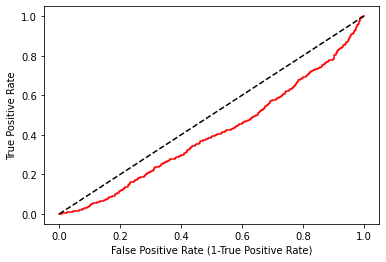

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,color='red',label='logit model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate (1-True Positive Rate)')
plt.ylabel('True Positive Rate')

In [67]:
auc

0.5